#### Import Modules

In [1]:
# Regular imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Metrics and 
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Tensorflow
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

2023-10-16 00:53:19.292450: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 00:53:19.316618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-16 00:53:19.316647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-16 00:53:19.316666: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-16 00:53:19.321656: I tensorflow/core/platform/cpu_feature_g

In [2]:
# print(tf.reduce_sum(tf.random.normal([1000, 1000])))

In [3]:
# set pandas to show all columns
pd.set_option('display.max_columns', None)

In [4]:
# Set seeds to make the experiment more reproducible.
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

seed = 0
seed_everything(seed)

In [5]:
# Load the dataset
data = pd.read_csv('../data/interim/grouped_File1.csv', parse_dates=['index'], index_col=0)

In [6]:
data.head(10)

1392   1951   1491   1194   1804   1048   1802   1287  \
index                                                                         
2009-07-15 01:30:00  0.140  0.014  0.018  0.280  0.086  0.200  0.351  1.432   
2009-07-15 02:00:00  0.138  0.014  0.011  0.245  0.123  0.143  0.243  1.576   
2009-07-15 02:30:00  0.140  0.041  0.111  0.389  0.100  0.200  0.258  1.428   
2009-07-15 03:00:00  0.145  0.115  0.018  0.102  0.181  0.248  0.284  1.268   
2009-07-15 03:30:00  0.145  0.069  0.013  0.139  0.178  0.160  0.330  0.966   
2009-07-15 00:30:00  0.157  0.165  0.019  0.399  0.096  0.148  0.910  0.840   
2009-07-15 01:00:00  0.144  0.112  0.112  0.305  0.126  0.225  0.514  0.986   
2009-07-17 12:00:00  0.128  0.112  0.329  2.800  0.116  1.867  0.152  1.335   
2009-07-17 12:30:00  0.142  0.054  1.385  1.358  0.332  0.530  0.141  0.949   
2009-07-17 13:00:00  0.145  0.198  0.130  1.082  0.257  0.181  0.014  2.462   

                      1529   1463   1860   1922   1334   1604   1042   1494  \
index                                                                         
2009-07-15 01:30:00  0.281  0.223  0.220  0.134  0.098  0.249  0.264  0.131   
2009-07-15 02:00:00  0.142  0.280  0.269  0.062  0.306  0.151  0.194  0.175   
2009-07-15 02:30:00  0.208  0.159  0.194  0.062  0.168  0.173  0.147  0.245   
2009-07-15 03:00:00  0.233  0.163  0.164  0.201  0.258  0.148  0.086  0.170   
2009-07-15 03:30:00  0.079  0.195  0.157  0.140  0.214  0.223  0.044  0.152   
2009-07-15 00:30:00  0.407  0.138  0.156  0.085  0.165  0.429  0.477  0.252   
2009-07-15 01:00:00  0.421  0.337  0.172  0.203  0.230  0.149  0.481  0.213   
2009-07-17 12:00:00  0.204  0.186  0.277  0.043  0.268  0.402  0.538  0.165   
2009-07-17 12:30:00  0.202  0.314  0.341  0.175  0.316  0.312  1.232  0.160   
2009-07-17 13:00:00  0.134  0.239  0.340  0.126  0.852  0.179  3.746  0.132   

                      1078   1984   1083   1978   1481   1524   1637   1783  \
index                                                                         
2009-07-15 01:30:00  0.118  0.327  0.411  0.823  0.427  0.040  0.120  0.162   
2009-07-15 02:00:00  0.081  0.219  0.321  0.827  0.424  0.000  0.049  0.988   
2009-07-15 02:30:00  0.106  0.162  0.143  0.816  0.338  0.040  0.150  0.577   
2009-07-15 03:00:00  0.100  0.157  0.167  0.816  0.262  0.032  0.095  0.305   
2009-07-15 03:30:00  0.094  0.043  0.159  0.842  0.260  0.008  0.055  0.144   
2009-07-15 00:30:00  0.135  0.256  0.634  0.817  3.325  0.014  0.048  0.109   
2009-07-15 01:00:00  0.067  0.271  0.595  0.855  3.031  0.027  0.122  0.136   
2009-07-17 12:00:00  0.222  0.573  0.406  0.838  0.294  3.986  1.231  0.342   
2009-07-17 12:30:00  0.165  1.745  0.341  0.801  1.782  3.456  1.690  0.357   
2009-07-17 13:00:00  0.195  0.735  0.298  0.798  2.757  1.079  0.818  0.409   

                      1539   1777   1518   1698   1094   1302   1824   1957  \
index                                                                         
2009-07-15 01:30:00  0.145  0.199  0.631  0.106  0.223  0.186  0.118  0.097   
2009-07-15 02:00:00  0.155  0.185  0.630  0.125  0.218  0.144  0.115  0.096   
2009-07-15 02:30:00  0.131  0.088  0.708  0.054  0.320  0.178  0.185  0.096   
2009-07-15 03:00:00  0.880  0.111  0.635  0.055  0.245  0.164  0.133  0.097   
2009-07-15 03:30:00  0.190  0.249  0.648  0.143  0.118  0.158  0.113  0.097   
2009-07-15 00:30:00  0.156  0.136  0.659  0.082  0.435  0.213  0.172  0.098   
2009-07-15 01:00:00  0.145  0.088  0.703  0.053  0.360  0.173  0.120  0.096   
2009-07-17 12:00:00  0.250  0.620  3.963  0.135  0.273  0.192  0.038  3.450   
2009-07-17 12:30:00  0.136  0.357  3.928  0.053  0.494  0.306  0.038  3.496   
2009-07-17 13:00:00  0.269  0.283  3.248  0.053  0.642  0.199  0.093  2.981   

                      1020   1502   1625   1817   1196   1320   1105   1870  \
index                                                                         
2009-07-15 01:30:00  0.197  0.116  0.486  0.212  0.050  1.528  0.261

In [7]:
def structure_data(dataset, n_future, n_past):
    """
    This function is used to split the data into features and targets, structuring the training
    data to look like the number of days backward the model should look, and the number of days forward
    the model should predict.
    
    Returns:
        dataX: features
        dataY: targets
    """

    dataX = []
    dataY = []
    
    for i in range(n_past, len(dataset) - n_future +1):
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
        dataY.append(dataset[i + n_future - 1:i + n_future, -1])
        
    dataX, dataY = np.array(dataX), np.array(dataY)
    
    return dataX, dataY

In [8]:
def sumAllRows(dataframe: pd.DataFrame) -> pd.DataFrame:

    # Sum all rows along axis 1
    row_sums = dataframe.sum(axis=1)

    # Create a new DataFrame with only the row sums
    result_df = pd.DataFrame({'kWh': row_sums})
    
    return result_df

In [9]:
summed_df = sumAllRows(data)

In [10]:
summed_df.sort_index(inplace=True)

summed_df

,kWh
index,
2009-07-15 00:30:00,464.058
2009-07-15 01:00:00,400.316
2009-07-15 01:30:00,353.643
2009-07-15 02:00:00,320.181
2009-07-15 02:30:00,293.990
...,...
2011-01-01 22:00:00,803.117
2011-01-01 22:30:00,762.226
2011-01-01 23:00:00,732.878


In [11]:
summed_df.isna().sum()

kWh    0
dtype: int64

In [12]:
type(summed_df.kWh.iloc[0])

numpy.float64

In [13]:
scaler = MinMaxScaler()
scaler = scaler.fit(summed_df)
scaled_summed_df = scaler.transform(summed_df)

In [14]:
scaled_summed_df

array([[0.17588241],
       [0.12625163],
       [0.08991111],
       ...,
       [0.38519096],
       [0.4968645 ],
       [0.46453932]])

#### Train-Test Split


In [15]:
future = 1
past = 48 * 30
X, y = structure_data(scaled_summed_df[:5000], n_future=future, n_past=past)

In [16]:
X.shape

(3560, 1440, 1)

In [17]:
y[0]

array([0.18786537])

In [18]:
# Time series train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
X_train.shape

(2848, 1440, 1)

In [20]:
X_test.shape

(712, 1440, 1)

In [21]:
y_test.shape

(712, 1)

#### Train Model

In [22]:
# This is to configure GPU and avoid OOM error by setting GPU memory consumption growth
try:
    gpus = tf.config.list_physical_devices('GPU')
except Exception as e:
    print("Error configuring GPU: \n", e)

if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(gpus)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-16 00:53:21.772101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 00:53:21.775361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 00:53:21.775523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [23]:
# Define Hyperparameters
serie_size =  X_train.shape[1]
n_features =  X_train.shape[2]

epochs = 20
batch = 16
lr = 0.0001

In [24]:
# Build the model
encoder_decoder = Sequential()
encoder_decoder.add(L.LSTM(serie_size, activation='tanh', input_shape=(serie_size, n_features), return_sequences=True))
encoder_decoder.add(L.LSTM(32, activation='tanh', return_sequences=True))
encoder_decoder.add(L.LSTM(16, activation='tanh', return_sequences=False))
encoder_decoder.add(L.RepeatVector(serie_size))
encoder_decoder.add(L.LSTM(serie_size, activation='tanh', return_sequences=True))
encoder_decoder.add(L.LSTM(16, activation='tanh', return_sequences=False))
encoder_decoder.add(L.Dense(1))
encoder_decoder.summary()

adam = optimizers.Adam(lr)
encoder_decoder.compile(loss='mse', optimizer=adam)


2023-10-16 00:53:21.788349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 00:53:21.788511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 00:53:21.788576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1440, 1440)        8305920   
                                                                 
 lstm_1 (LSTM)               (None, 1440, 32)          188544    
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVecto  (None, 1440, 16)          0         
 r)                                                              
                                                                 
 lstm_3 (LSTM)               (None, 1440, 1440)        8392320   
                                                                 
 lstm_4 (LSTM)               (None, 16)                93248     
                                                        

In [25]:
# set conditions to stop training if the model begins to overfit
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=3, 
                                                  mode='min',
                                                  restore_best_weights=True)

encoder_decoder_history = encoder_decoder.fit(X_train, y_train, 
                                              batch_size=batch, 
                                              epochs=epochs, 
                                              verbose=1,
                                              callbacks=[early_stopping],
                                              validation_split=0.1)



Epoch 1/20


2023-10-16 00:53:27.163548: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-16 00:53:27.908204: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c16e3ad180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-16 00:53:27.908229: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-10-16 00:53:27.912909: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-16 00:53:27.968934: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 [==============================] - 197s 1s/step - loss: 0.0251 - val_loss: 0.0361
Epoch 2/20
161/161 [==============================] - 196s 1s/step - loss: 0.0109 - val_loss: 0.0117
Epoch 3/20
161/161 [==============================] - 196s 1s/step - loss: 0.0090 - val_loss: 0.0115
Epoch 4/20
161/161 [==============================] - 196s 1s/step - loss: 0.0089 - val_loss: 0.0124
Epoch 5/20
161/161 [==============================] - 196s 1s/step - loss: 0.0089 - val_loss: 0.0116
Epoch 6/20
161/161 [==============================] - 193s 1s/step - loss: 0.0087 - val_loss: 0.0132


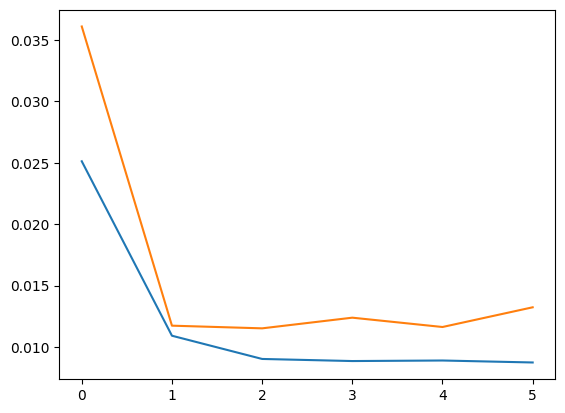

In [26]:
plt.figure()
plt.plot(encoder_decoder_history.history['loss'])
plt.plot(encoder_decoder_history.history['val_loss'])

In [27]:
yhat = encoder_decoder.predict(X_test)

23/23 [==============================] - 14s 572ms/step


In [28]:
yhat.shape

(712, 1)

In [29]:
y_test.shape

(712, 1)

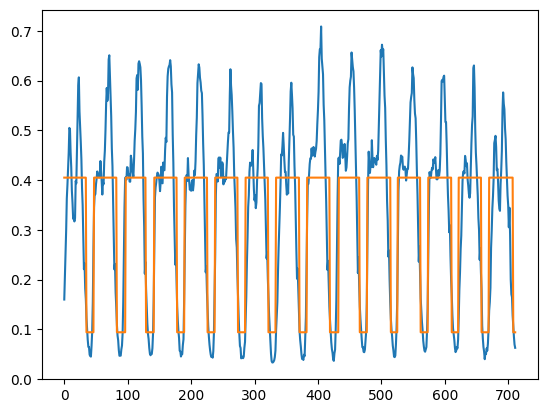

In [30]:
plt.figure()
plt.plot(y_test)
plt.plot(yhat)

In [31]:


def stat_eval(y_test: np.ndarray, yhat: np.ndarray):
    """
    Carries out statistical evaluation of model based on test data and 
    prediction. 
    
    Prints and returns a summary dictionary
    """
    # statistical evaluations
    
    print("="*5,"Statistical Eval","="*5,"\n")

    rmse = math.sqrt(mean_squared_error(yhat, y_test))

    print(f"Mean kWh: {round(np.mean(y_test), 4)} -- RMSE: {round(rmse, 4)}",
         f"-- RMSE < 10% Mean: ", round(rmse, 4)< round(np.mean(y_test), 4)/10)
                    
    return rmse



In [32]:
stat_eval(y_test=y_test, yhat=yhat)

===== Statistical Eval ===== 

Mean kWh: 0.3412 -- RMSE: 0.1112 -- RMSE < 10% Mean:  False


0.11117961963256139

In [33]:
# ===== Statistical Eval ===== 

# Mean kWh: 0.284 -- RMSE: 0.1553 -- RMSE < 10% Mean:  False
# 0.15525123492978649